# Why are so many employees leaving? and Who exactly are these employees?

** First let's do some exploratory analysis on our data! **

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

hr_data = pd.read_csv('HR_comma_sep.csv')
print(hr_data.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In order to make the data easier to understand I will add a column that gives the *salary* column a numerical value as follows:

Salary Description | Salary Value 
--- | ---
low | 40,000
medium | 60,000
high | 80,000
    

In [2]:
def salary_estimate(row):
    salary_category = row['salary']
    if salary_category  == 'low':
        result = 40000
    elif salary_category == 'medium':
        result = 60000
    else:
        result = 80000
    return(result)
hr_data['salary_estimate'] = hr_data.apply(salary_estimate, axis = 1)

Furthermore, I am interested in performing analysis on this data in the following groups:

- Good performers who left the company
- Good performers who stayed with the company
- Average/Below Average performers who left the company
- Average/Below A performers who stayed with the company

I think it will be interesting to see the similarities and differences between these groups.

** What is an Above Average performer?**

*I will define an above average performer as anyone who's performance evaluation was at least 1 standard deviation above the mean(Top 84th percentile). Everyone else is average or below average.*

In [3]:
eval_mean = hr_data['last_evaluation'].mean()
eval_std = np.std(hr_data['last_evaluation'])
hr_data['performance(standard units)'] = (hr_data['last_evaluation']- eval_mean)/eval_std

def performance_label(row):
    performance = row['performance(standard units)']
    if performance >=1:
        result = 'Above Average'
    else:
        result = 'Average or Below'
    return(result)
hr_data['performance label'] = hr_data.apply(performance_label, axis = 1)
hr_data['left(as_string)'] = (hr_data['left'].astype(str))

Next we'll take a look at the average values for numerical columns in our data as an initial look into the potential problem.

In [4]:
columns = (hr_data.columns)
num_columns = (hr_data._get_numeric_data().columns)

sep_hr_data = hr_data
sep_hr_data['Performance cluster'] = sep_hr_data['left(as_string)'] + ' ' + sep_hr_data['performance label']

sep_hr_pivot = sep_hr_data.pivot_table(index= (['Performance cluster']), values =num_columns, aggfunc=np.mean)
print(sep_hr_pivot.transpose())

Performance cluster          0 Above Average  0 Average or Below  \
Work_accident                       0.172983            0.175504   
average_montly_hours              202.358003          198.254872   
last_evaluation                     0.941899            0.660180   
left                                0.000000            0.000000   
number_project                      3.825680            3.777137   
performance(standard units)         1.319193           -0.326718   
promotion_last_5years               0.025858            0.026347   
salary_estimate                 52492.197949        53147.523136   
satisfaction_level                  0.680013            0.663585   
time_spend_company                  3.380740            3.379858   

Performance cluster          1 Above Average  1 Average or Below  
Work_accident                       0.038425            0.050988  
average_montly_hours              254.862632          187.898024  
last_evaluation                     0.947666      

\**In the columns above a 1 in front of the column name indicates the employees that left; a 0 in front of the column name indicates the employees that stayed*\*

The values that immediately jump out to me are the average_montly_hours, number_project, salary_estimate, and promotion_last_5years, so I will expore the more in depth.

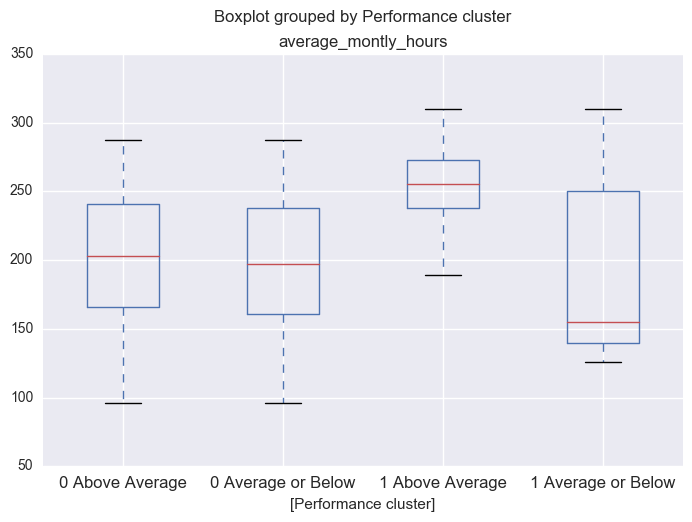

In [5]:
sep_hr_data[['Performance cluster', 'average_montly_hours']].boxplot(by = 'Performance cluster')
plt.show()

Good performing employees who left the company were averaging 255 hours per month, which equates to about **12 hours per day(based on a 250 days in a year)**.
All other groups were averaging **9 to 10 hours per day.**

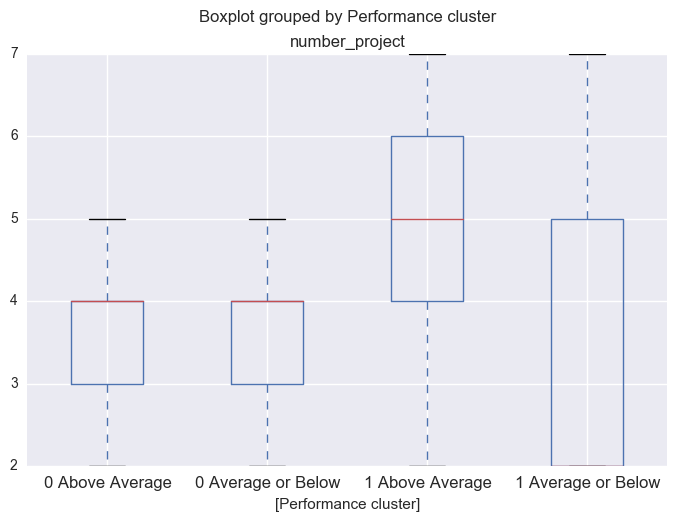

In [6]:
sep_hr_data[['Performance cluster', 'number_project']].boxplot(by = 'Performance cluster')
plt.show()

Similarly, the Above Average performers who left, were more likely to take on projects, which most likely correlates with number of work hours.

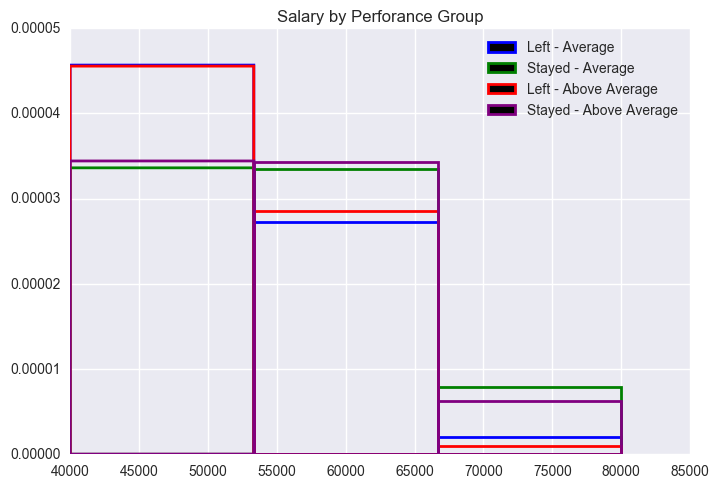

In [7]:
from matplotlib import pyplot

la = sep_hr_data['salary_estimate'][sep_hr_data['Performance cluster'] == '1 Average or Below']
sa = sep_hr_data['salary_estimate'][sep_hr_data['Performance cluster'] == '0 Average or Below']
laa = sep_hr_data['salary_estimate'][sep_hr_data['Performance cluster'] == '1 Above Average']
saa = sep_hr_data['salary_estimate'][sep_hr_data['Performance cluster'] == '0 Above Average']

pyplot.hist(la,3, alpha=1, label='Left - Average', normed = True, linewidth=2, facecolor = 'none', edgecolor = 'blue')
pyplot.hist(sa,3, alpha=1, label='Stayed - Average', normed = True,linewidth=2, facecolor = 'none', edgecolor = 'green')
pyplot.hist(laa,3, alpha=1, label='Left - Above Average', normed = True,linewidth=2, facecolor = 'none', edgecolor = 'red')
pyplot.hist(saa,3, alpha=1, label='Stayed - Above Average', normed = True,linewidth=2, facecolor = 'none', edgecolor = 'purple')
pyplot.legend(loc='upper right')
pyplot.title('Salary by Perforance Group')
pyplot.show()

Above, this histogram shows us that a high percentage of those who left the company fell into the low income category. Those who stayed with the company were more likely to fall into the medium to high income category.

**Next, I want to take a look at the correlations between certain features for Above Average vs Average/Below Average performs who left the company.**

## Correlations for Above Average Performers

In [8]:
columns = ['left','average_montly_hours', 'number_project','time_spend_company']

aa_sep_hr_data = sep_hr_data[(sep_hr_data['performance label']=='Above Average')]
ab_sep_hr_data = sep_hr_data[(sep_hr_data['performance label']!='Above Average')]
average_corr = ab_sep_hr_data.corr()
above_average_corr = aa_sep_hr_data.corr().loc[columns].transpose()
below_average_corr = ab_sep_hr_data.corr().loc[columns].transpose()
print(above_average_corr)

                                 left  average_montly_hours  number_project  \
satisfaction_level          -0.242301             -0.255929       -0.471205   
last_evaluation              0.076439             -0.025307       -0.044458   
number_project               0.537256              0.366696        1.000000   
average_montly_hours         0.521604              1.000000        0.366696   
time_spend_company           0.418430              0.187693        0.211145   
Work_accident               -0.185972             -0.086005       -0.071028   
left                         1.000000              0.521604        0.537256   
promotion_last_5years       -0.087218              0.003030       -0.029398   
salary_estimate             -0.167982             -0.048164       -0.108459   
performance(standard units)  0.076439             -0.025307       -0.044458   

                             time_spend_company  
satisfaction_level                    -0.077654  
last_evaluation               

## Correlations for Below Average Performers

In [9]:
print(below_average_corr)

                                 left  average_montly_hours  number_project  \
satisfaction_level          -0.450204              0.037969       -0.059429   
last_evaluation             -0.110281              0.334712        0.348881   
number_project              -0.157442              0.402044        1.000000   
average_montly_hours        -0.085878              1.000000        0.402044   
time_spend_company           0.043103              0.088013        0.171130   
Work_accident               -0.144042              0.013827        0.017399   
left                         1.000000             -0.085878       -0.157442   
promotion_last_5years       -0.053722             -0.002285        0.002441   
salary_estimate             -0.152379              0.017117        0.033399   
performance(standard units) -0.110281              0.334712        0.348881   

                             time_spend_company  
satisfaction_level                    -0.116547  
last_evaluation               

### Key Points 

- For Above Average Performers:
    - Leaving the company is highly correlated with working many hours, taking on many projects and time spent with the company
    - Monthly hours and number of projects is highly correlated with a high level of dissatisfaction
    - Time spent with the company also seemed to correlate with number of projects taken on
    - At the same time, there was no correlation between number of projects and promotions or higher performance evaluations
    
    
- For Average/Below Average Performers:
    -  Leaving the company is highly correlated satisfaction level. No other metric is as correlated
    -  For this group, as opposed to the Above Average group, Monthly hours and number of projects is highly correlated with higher performance reviews.

## Conclusion

**Above Average Performers** seem to be overworked. Because they are above average performers, they may be given many difficult projects by their managers, that they may not be fully prepared for, resulting in a working overtime and high levels of stress and dissastisfaction. Also, they may be getting average performance reviews for these particular projects, resulting in little to no salary increases, or promotions. As stated earlier, time seems to be highly correlated with leaving the company. Due to lack of praise at work, and lack of pay increases, time may be the biggest factor in leaving for these valueable employees.


**Average/Below Average Performers** do not seem to be overworked. These employees seem to be leaving the company because they are just very unsatisfied. It does seem that these employees are getting higher performance reviews based on the number of projects that they are taking on. I believe that these employees are given less projects, due to past underperformace, and are also given easier projects. This is resulting is higher performance reviews when these 'easy' projects are completed, but are not accompanied by promotions or salary increases.

Upon starting this project, I believed that these two groups were leaving the company for different reasons. Now, I understand they were actually leaving for the same reasons, but from different underlying factors.

## Actions to be taken

- Require managers to 'check-in' with their employees more often, to make sure that their concerns are being voiced
    - Managers should reassess goals more aften
        - Provide more attainable goals
- More team projects, so there is less stress on any individual employee
    - Increased potential for better overall performance
    - At the same time, many underperformers will learn the practices of the overperformers
- Promote empoyees based on team performances
    - There are many employees that are not getting promoted, who should be
        - Team performance evaluations will allow more employees to get recognized/promoted
- Implementation of a flexible 8 hour work day, with a strict 10 hour limit
    - Prevents burnout and promotes good work/life balance
- Implementation of more worker recognition programs
    - To make employees feel appreciated a less likely to leave

*Disclosure - Project in incomplete -  I will be performing machine learning techniques in order to confirm these findings.*